<a href="https://colab.research.google.com/github/PMcTwist/Machine-Learning-Course/blob/main/Week5Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# Basic imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specific imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

Import Dataset

In [ ]:
# Read the data from csv
dataset = pd.read_csv('data.csv')

# Check the data
print(dataset.head())

# Break up the two sets you want to compare
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Split the training and test sets

In [ ]:
# Call the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Get the dimentions of the split
print(f"x Training Shape: {x_train.shape}")
print(f"y Training Shape: {y_train.shape}")



x Training Shape: (320, 2)
y Training Shape: (320,)


Scale the Data

In [ ]:
# Scale the data to normalize it
scaler = StandardScaler()

# scale the data using the scaler
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# Verfiy you did it!
print(f"Scaled x_training: \n{x_train_scaled[:5]}") # used \n to make a new line
print(f"Scaled x_test: \n{x_test_scaled[:5]}")

# Enjoy it

Scaled x_training: 
[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]]
Scaled x_test: 
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


Set Your K Classifier

In [ ]:
# Set variable number for K value
sample_size = 5

# Call the model
classifier = KNeighborsClassifier(
    n_neighbors = sample_size,
    metric = 'minkowski',
    p=2
    )

# Fit the training data to the model
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

Make predictions

In [ ]:
# Predict outcoming using test data
y_pred = classifier.predict(x_test_scaled)

# Check out the good stuff!
print(f"The computer thinks y is: \n{y_pred}")

The computer thinks y is: 
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


Setup the confusion matrix

In [ ]:
# Make a matrix to feed into a dataframe
cm = confusion_matrix(y_test, y_pred)

# feed the dataframe
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
    )

# Verify your happy fed dataframe
print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           55            3
Actual 1            1           21


Make a pretty Graph

(320,)


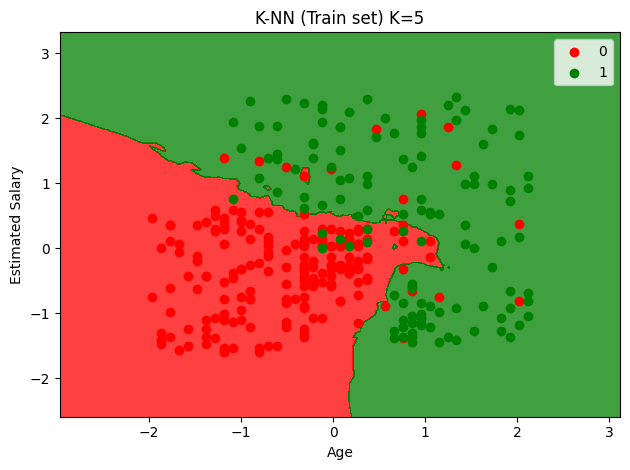

In [ ]:
# Create a new figure
plt.figure()

# Extract features and labels from the training set
x_set, y_set = x_train_scaled, y_train

print(y_set.shape)

# Create a meshgrid for feature space
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Plot decision boundary (contour plot)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set the plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot data points on the graph
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=str(j))

# Add labels and legend
plt.title(f'K-NN (Train set) K={sample_size}')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot to a vector format file (SVG) for use in reports and presentations
# if you are running this in Colab, the file will be saved in the files panel
# on the left side if you do not see it there, make sure you right-click on the
# panel, click refresh and you should see it there you can download this file
# using the 3-dot menu on the right hand side of the filename for your reports and presentations
plt.savefig('train_set_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()


Make Another Pretty Graph

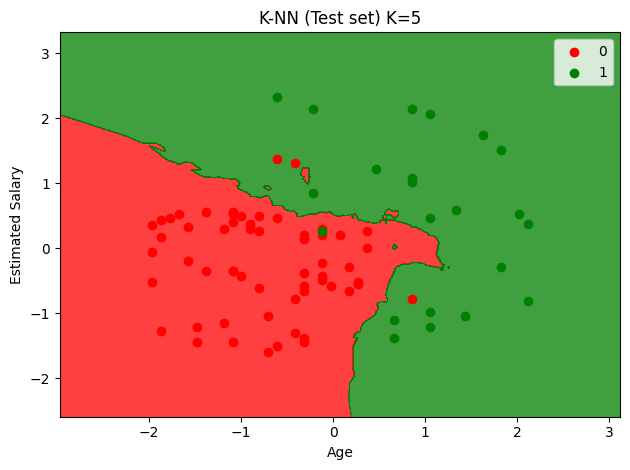

In [ ]:
# Create a new figure
plt.figure()

# Extract features and labels from the training set
x_set, y_set = x_test_scaled, y_test

# Create a meshgrid for feature space
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Plot decision boundary (contour plot)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Set the plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot data points on the graph
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=str(j))

# Add labels and legend
plt.title(f'K-NN (Test set) K={sample_size}')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot to a vector format file (SVG) for use in reports and presentations
# if you are running this in Colab, the file will be saved in the files panel
# on the left side if you do not see it there, make sure you right-click on the
# panel, click refresh and you should see it there you can download this file
# using the 3-dot menu on the right hand side of the filename for your reports and presentations
plt.savefig('test_set_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

Profit